In [1]:
!pip install numpy tensorflow matplotlib

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

170498071/170498071 [==============================] - 4s 0us/step


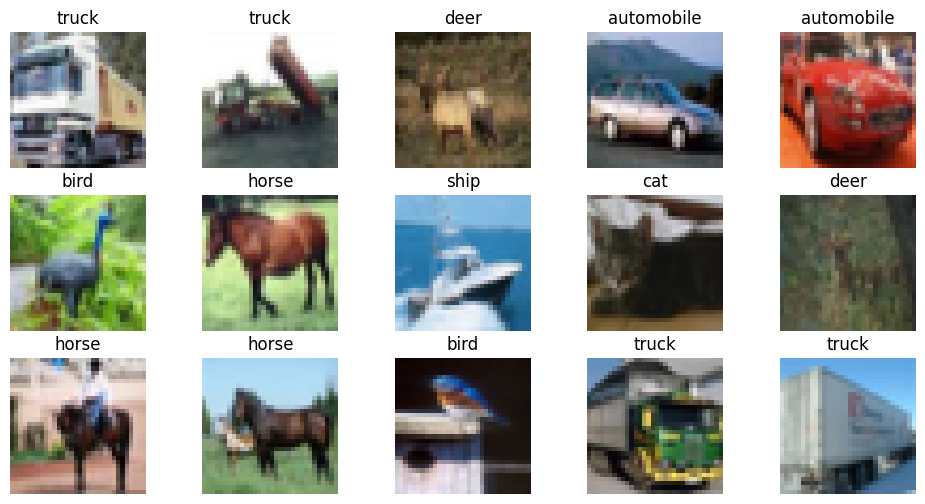

Epoch 1/10
391/391 [==============================] - 63s 148ms/step - loss: 1.7046 - accuracy: 0.3787 - val_loss: 1.3851 - val_accuracy: 0.4985
Epoch 2/10
391/391 [==============================] - 58s 149ms/step - loss: 1.3099 - accuracy: 0.5321 - val_loss: 1.2453 - val_accuracy: 0.5526
Epoch 3/10
391/391 [==============================] - 55s 141ms/step - loss: 1.1597 - accuracy: 0.5891 - val_loss: 1.1647 - val_accuracy: 0.5864
Epoch 4/10
391/391 [==============================] - 57s 145ms/step - loss: 1.0584 - accuracy: 0.6276 - val_loss: 1.0981 - val_accuracy: 0.6165
Epoch 5/10
391/391 [==============================] - 55s 140ms/step - loss: 0.9911 - accuracy: 0.6542 - val_loss: 0.9613 - val_accuracy: 0.6639
Epoch 6/10
391/391 [==============================] - 56s 142ms/step - loss: 0.9203 - accuracy: 0.6785 - val_loss: 0.9644 - val_accuracy: 0.6612
Epoch 7/10
391/391 [==============================] - 55s 142ms/step - loss: 0.8685 - accuracy: 0.6971 - val_loss: 0.9135 - val_ac

In [3]:
# Завантаження та попередня обробка даних
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

# Відображення прикладів зображень з CIFAR-10
classes = {
    0: 'airplane', 1: 'automobile', 2: 'bird', 3: 'cat', 4: 'deer',
    5: 'dog', 6: 'frog', 7: 'horse', 8: 'ship', 9: 'truck'
}
plt.figure(figsize=(12,6))
for i in range(1, 16):
    plt.subplot(3, 5, i)
    plt.imshow(x_train[i])
    plt.axis('off')
    plt.title(f"{classes[np.argmax(y_train[i])]}")
plt.show()

# Побудова CNN моделі
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])

# Компіляція моделі
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Навчання моделі
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_data=(x_test, y_test))

In [4]:
# Оцінка точності на тестовому наборі даних
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Тестові втрати:", test_loss)
print("Тестова точність:", test_acc)

# Навчальні точність та втрати (остання епоха)
train_loss = history.history['loss'][-1]
train_acc = history.history['accuracy'][-1]
print("Навчальні втрати:", train_loss)
print("Навчальна точність:", train_acc)

313/313 [==============================] - 4s 14ms/step - loss: 0.8561 - accuracy: 0.7113
Тестові втрати: 0.8560619354248047
Тестова точність: 0.7113000154495239
Навчальні втрати: 0.7448084354400635
Навчальна точність: 0.7405999898910522


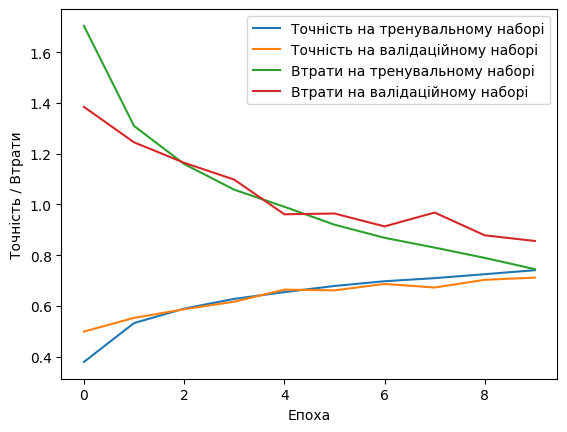

In [5]:
# Побудова графіка точності та втрат під час тренування
plt.plot(history.history['accuracy'], label='Точність на тренувальному наборі')
plt.plot(history.history['val_accuracy'], label='Точність на валідаційному наборі')
plt.plot(history.history['loss'], label='Втрати на тренувальному наборі')
plt.plot(history.history['val_loss'], label='Втрати на валідаційному наборі')
plt.xlabel('Епоха')
plt.ylabel('Точність / Втрати')
plt.legend()
plt.show()